## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

W0721 11:12:48.120951 140264099223424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 11:12:48.157489 140264099223424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 11:12:48.170020 140264099223424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 11:12:48.338493 140264099223424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 11:12:48.350542 140264099223424 deprecation_wrappe

In [6]:
model.fit(x_train, y_train, 
          epochs=500,
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0721 11:13:12.596536 140264099223424 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 11:13:12.658927 140264099223424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 15s 295us/step - loss: 2.2782 - acc: 0.1423 - val_loss: 2.2332 - val_acc: 0.1758
Epoch 2/500
50000/50000 [==============================] - 14s 289us/step - loss: 2.2049 - acc: 0.2045 - val_loss: 2.1804 - val_acc: 0.2304
Epoch 3/500
50000/50000 [==============================] - 15s 294us/step - loss: 2.1565 - acc: 0.2418 - val_loss: 2.1349 - val_acc: 0.2550
Epoch 4/500
50000/50000 [==============================] - 15s 299us/step - loss: 2.1137 - acc: 0.2661 - val_loss: 2.0943 - val_acc: 0.2781
Epoch 5/500
50000/50000 [==============================] - 15s 295us/step - loss: 2.0759 - acc: 0.2811 - val_loss: 2.0591 - val_acc: 0.2947
Epoch 6/500
50000/50000 [==============================] - 14s 282us/step - loss: 2.0429 - acc: 0.2934 - val_loss: 2.0286 - val_acc: 0.3010
Epoch 7/500
50000/50000 [==============================] - 14s 284us/step - loss: 2.0140 - acc: 0.3020 - val_l

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168461). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 27s 530us/step - loss: 1.6099 - acc: 0.4410 - val_loss: 1.6222 - val_acc: 0.4330
Epoch 77/500
50000/50000 [==============================] - 26s 525us/step - loss: 1.6078 - acc: 0.4406 - val_loss: 1.6214 - val_acc: 0.4345
Epoch 78/500
50000/50000 [==============================] - 26s 523us/step - loss: 1.6055 - acc: 0.4410 - val_loss: 1.6160 - val_acc: 0.4352
Epoch 79/500
50000/50000 [==============================] - 26s 525us/step - loss: 1.6028 - acc: 0.4429 - val_loss: 1.6146 - val_acc: 0.4400
Epoch 80/500
50000/50000 [==============================] - 27s 544us/step - loss: 1.6004 - acc: 0.4429 - val_loss: 1.6118 - val_acc: 0.4389
Epoch 81/500
50000/50000 [==============================] - 26s 521us/step - loss: 1.5979 - acc: 0.4423 - val_loss: 1.6106 - val_acc: 0.4370
Epoch 82/500
50000/50000 [==============================] - 27s 534us/step - loss: 1.5958 - acc: 0.4445 - val_loss: 1.6068 - val_acc: 0.4401
Epoch 83/500
50000/50000 [

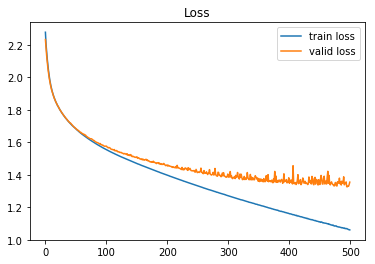

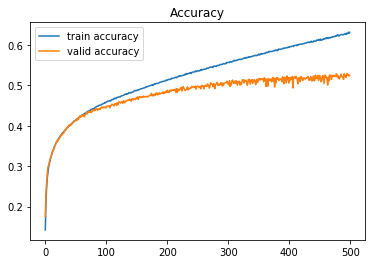

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()